### Cross Validation

In [5]:
import pandas as pd
df_cancer=pd.read_csv('cancer.csv')
df_auto=pd.read_csv('auto-mpg.csv')
df_titanic=pd.read_csv('titanic.csv')

In [7]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print("Shape of Cancer dataset:",df_cancer.shape)
print('Shape of mpg dataset:', df_auto.shape)
print("Shape of titanic dataset:", df_titanic.shape)

Shape of Cancer dataset: (569, 33)
Shape of mpg dataset: (398, 9)
Shape of titanic dataset: (891, 12)


In [13]:
###  Independent And dependent features
X_cancer=df_cancer.iloc[:,2:32]
y_cancer=df_cancer.iloc[:,1]

In [14]:
X_cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
###  Independent And dependent features
X_auto=df_auto.iloc[:,1:]
y_auto=df_auto.iloc[:,0]

X_titanic = df_titanic.iloc[:,2:]
y_titanic = df_titanic.iloc[:,1]

In [21]:
X_cancer=X_cancer.dropna(axis=1)
X_auto=X_auto.dropna(axis=1)
X_titanic=X_titanic.dropna(axis=1)

target variable distribution in cancer dataset: B    357
M    212
Name: diagnosis, dtype: int64
target variable distribution in auto dataset: AxesSubplot(0.125,0.125;0.775x0.755)
target variable distribution in titanic dataset: 0    549
1    342
Name: Survived, dtype: int64


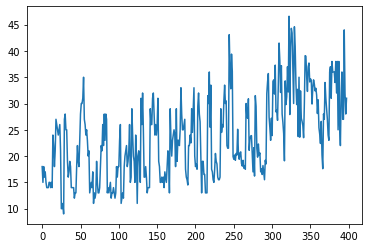

In [23]:
print("target variable distribution in cancer dataset:", y_cancer.value_counts())
print("target variable distribution in auto dataset:", y_auto.plot())
print("target variable distribution in titanic dataset:", y_titanic.value_counts())

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_auto1 = X_auto.copy()
for cols in X_auto1.columns:
    X_auto1[cols] = lb.fit_transform(X_auto1[cols])
X_auto1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cylinders     398 non-null    int64
 1   displacement  398 non-null    int64
 2   horsepower    398 non-null    int32
 3   weight        398 non-null    int64
 4   acceleration  398 non-null    int64
 5   model year    398 non-null    int64
 6   origin        398 non-null    int64
 7   car name      398 non-null    int32
dtypes: int32(2), int64(6)
memory usage: 21.9 KB


In [35]:
for cols in X_titanic.columns:
    X_titanic[cols] = lb.fit_transform(X_titanic[cols])
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Name    891 non-null    int32
 2   Sex     891 non-null    int32
 3   SibSp   891 non-null    int64
 4   Parch   891 non-null    int64
 5   Ticket  891 non-null    int32
 6   Fare    891 non-null    int64
dtypes: int32(3), int64(4)
memory usage: 38.4 KB


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
X_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

### HoldOut Validation Approach- Train And Test Split

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.30, random_state=4)
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_auto, y_auto, test_size=0.30, random_state=4)
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.30, random_state=4)

model_cancer = DecisionTreeClassifier()
model_auto = DecisionTreeRegressor()
model_titanic = DecisionTreeClassifier()

model_cancer.fit(X_train_cancer, y_train_cancer)
model_auto.fit(X_train_auto, y_train_auto)
model_titanic.fit(X_train_titanic, y_train_titanic)

result_cancer = model_cancer.score(X_test_cancer, y_test_cancer)
result_auto = model_auto.score(X_test_auto, y_test_auto)
result_titanic = model_titanic.score(X_test_titanic, y_test_titanic)

print(" Modelling results cancer dataset:",result_cancer)
print(" Modelling results auto dataset:",result_auto)
print(" Modelling results titanic dataset:",result_titanic)

 Modelling results cancer dataset: 0.9005847953216374
 Modelling results auto dataset: 0.7806877617309114
 Modelling results titanic dataset: 0.7798507462686567


### K Fold Cross Validation

In [39]:
from sklearn.model_selection import KFold

model_cancer = DecisionTreeClassifier()
model_auto = DecisionTreeRegressor()
model_titanic = DecisionTreeClassifier()

kfold_validation=KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score

results_cancer=cross_val_score(model_cancer,X_cancer,y_cancer,cv=kfold_validation)
results_auto=cross_val_score(model_auto,X_auto,y_auto,cv=kfold_validation)
results_titanic=cross_val_score(model_titanic,X_titanic,y_titanic,cv=kfold_validation)

print(" Modelling results cancer dataset:",result_cancer)
print(" Modelling results auto dataset:",result_auto)
print(" Modelling results titanic dataset:",result_titanic)

print("Average result cancer dataset:", np.mean(results_cancer))
print("Average result auto dataset:",np.mean(results_auto))
print("Average result titanic dataset:",np.mean(results_titanic))

 Modelling results cancer dataset: 0.9005847953216374
 Modelling results auto dataset: 0.7806877617309114
 Modelling results titanic dataset: 0.7798507462686567
Average result cancer dataset: 0.9209586466165414
Average result auto dataset: 0.57006379380255
Average result titanic dataset: 0.7856429463171036


### Stratified K-fold Cross Validation

In [42]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

model_cancer = DecisionTreeClassifier()
#model_auto = DecisionTreeRegressor()  Not works for continuous dataset
model_titanic = DecisionTreeClassifier()

scores_cancer=cross_val_score(model_cancer,X_cancer,y_cancer,cv=skfold)
#scores_auto=cross_val_score(model_auto,X_auto,y_auto,cv=skfold)
scores_titanic=cross_val_score(model_titanic,X_titanic,y_titanic,cv=skfold)

print("Average result cancer dataset:", np.mean(scores_cancer))
#print("Average result auto dataset:",np.mean(scores_auto))
print("Average result titanic dataset:",np.mean(scores_titanic))

Average result cancer dataset: 0.91914299021891
Average result titanic dataset: 0.7665306634862846


### Leave One Out Cross Validation(LOOCV

In [45]:
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")

model_cancer = DecisionTreeClassifier()
model_auto = DecisionTreeRegressor()
model_titanic = DecisionTreeClassifier()

leave_validation=LeaveOneOut()

results_cancer=cross_val_score(model_cancer,X_cancer,y_cancer,cv=leave_validation)
results_auto=cross_val_score(model_auto,X_auto,y_auto,cv=leave_validation)
results_titanic=cross_val_score(model_titanic,X_titanic,y_titanic,cv=leave_validation)


print("Average result cancer dataset:", np.mean(results_cancer))
print("Average result auto dataset:",np.mean(results_auto))  # Does not work for continuous data
print("Average result titanic dataset:",np.mean(results_titanic))

Average result cancer dataset: 0.9332161687170475
Average result auto dataset: nan
Average result titanic dataset: 0.7833894500561167



## Repeated Random Test-Train Splits
#### This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [47]:
from sklearn.model_selection import ShuffleSplit

model_cancer = DecisionTreeClassifier()
model_auto = DecisionTreeRegressor()
model_titanic = DecisionTreeClassifier()

ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results_cancer=cross_val_score(model_cancer,X_cancer,y_cancer,cv=ssplit)
results_auto=cross_val_score(model_auto,X_auto,y_auto,cv=ssplit)
results_titanic=cross_val_score(model_titanic,X_titanic,y_titanic,cv=ssplit)

print("Average result cancer dataset:", np.mean(results_cancer))
print("Average result auto dataset:",np.mean(results_auto))  
print("Average result titanic dataset:",np.mean(results_titanic))

Average result cancer dataset: 0.9269005847953216
Average result auto dataset: 0.7640725793648981
Average result titanic dataset: 0.7753731343283582
